# Fuel Mix Over Time 

In [1]:
import gridstatus
import pandas as pd
import plotly.express as px

In [2]:
iso = gridstatus.NYISO()

## Get Fuel MIx Data

In [3]:
df = iso.get_fuel_mix(start="Nov 1, 2017", end="Dec 1, 2022")
df

100%|██████████| 61/61 [01:23<00:00,  1.37s/it]


,Time,Dual Fuel,Hydro,Natural Gas,Nuclear,Other Fossil Fuels,Other Renewables,Wind
0,2017-11-01 00:05:00-04:00,1815.0,3291.0,1594.0,5402.0,0.0,290.0,261.0
1,2017-11-01 00:10:00-04:00,1705.0,3185.0,1541.0,5401.0,0.0,285.0,259.0
2,2017-11-01 00:15:00-04:00,1683.0,3049.0,1498.0,5402.0,0.0,286.0,286.0
3,2017-11-01 00:20:00-04:00,1612.0,3022.0,1488.0,5402.0,0.0,285.0,313.0
4,2017-11-01 00:25:00-04:00,1561.0,2935.0,1488.0,5402.0,0.0,287.0,296.0
...,...,...,...,...,...,...,...,...
543073,2022-11-30 23:40:00-05:00,2454.0,2434.0,3673.0,3342.0,0.0,253.0,1651.0
543074,2022-11-30 23:45:00-05:00,2447.0,2352.0,3628.0,3342.0,0.0,252.0,1684.0
543075,2022-11-30 23:50:00-05:00,2420.0,2309.0,3566.0,3342.0,0.0,253.0,1715.0
543076,2022-11-30 23:55:00-05:00,2342.0,2256.0,3538.0,3342.0,0.0,252.0,1728.0


The call above retried fuel mix data in 5 minute increments. Let's resample the data to monthly

In [4]:
# resample to month start (MS) frequency
fuel_mix_hourly = df.set_index("Time").resample("H").mean()
data = fuel_mix_hourly.resample("MS").sum()[:-1].reset_index()
data.head(10)

,Time,Dual Fuel,Hydro,Natural Gas,Nuclear,Other Fossil Fuels,Other Renewables,Wind
0,2017-11-01 00:00:00-04:00,1.573968e+06,2.531928e+06,1.820341e+06,3.691667e+06,34647.991342,204631.604057,446180.586391
1,2017-12-01 00:00:00-05:00,2.180086e+06,2.510918e+06,2.165724e+06,3.663322e+06,115217.033671,200007.652359,398377.363705
2,2018-01-01 00:00:00-05:00,2.622223e+06,2.282970e+06,2.188042e+06,4.028542e+06,296391.763349,176729.788301,507351.954197
3,2018-02-01 00:00:00-05:00,1.279852e+06,2.235497e+06,1.910894e+06,3.315114e+06,23610.114286,166662.434649,443330.772107
4,2018-03-01 00:00:00-05:00,1.624682e+06,2.709626e+06,1.902294e+06,3.573660e+06,123399.206231,193060.572636,344040.517233
5,2018-04-01 00:00:00-04:00,1.628499e+06,2.512376e+06,2.029388e+06,2.870185e+06,24508.221605,194875.623428,374113.947364
6,2018-05-01 00:00:00-04:00,2.033018e+06,2.567769e+06,1.852400e+06,3.419482e+06,28013.870976,187603.310749,295070.172210
7,2018-06-01 00:00:00-04:00,2.463700e+06,2.232738e+06,2.109071e+06,3.800927e+06,16820.590832,192735.332003,214476.829655
8,2018-07-01 00:00:00-04:00,3.815281e+06,2.273509e+06,2.957611e+06,3.884576e+06,159995.689560,200652.408333,205469.735165
9,2018-08-01 00:00:00-04:00,4.103557e+06,2.227516e+06,3.057461e+06,3.731969e+06,98027.052796,201173.598958,204928.367176


In [5]:
top_sources = data.set_index("Time").sum().sort_values(ascending=False).index.tolist()
top_sources

['Nuclear',
 'Dual Fuel',
 'Hydro',
 'Natural Gas',
 'Wind',
 'Other Renewables',
 'Other Fossil Fuels']

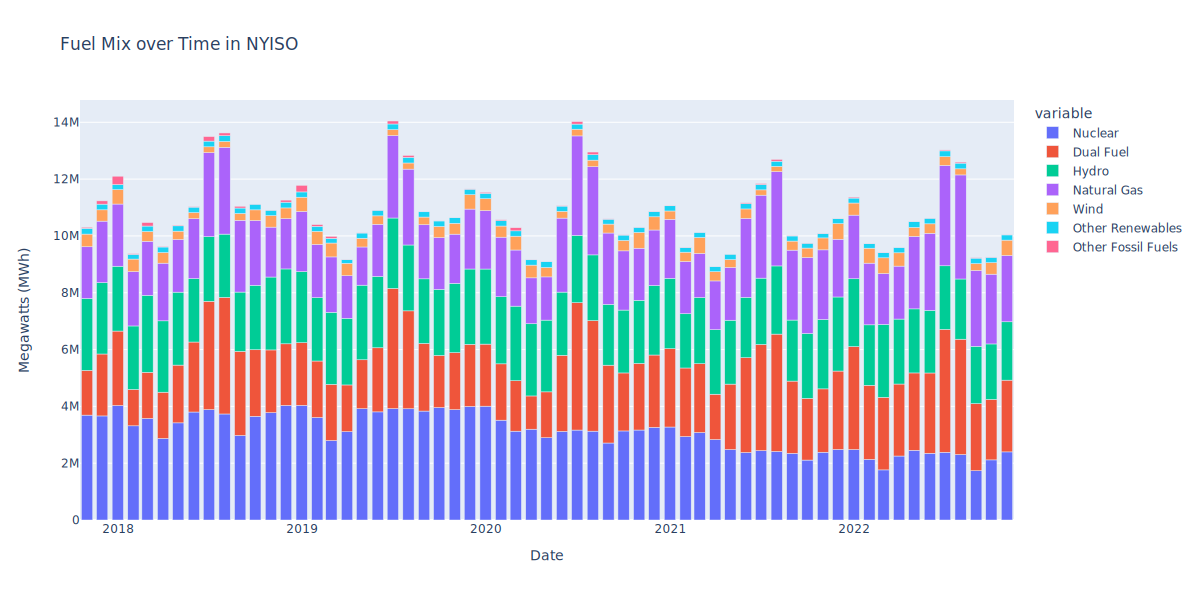

In [6]:
fig = px.bar(data, x="Time", y=top_sources, title="Fuel Mix over Time in NYISO")
fig.update_layout(xaxis_title="Date", yaxis_title="Megawatts (MWh)")
fig.show("svg", width=1200, height=600)

we can also look at percentages over time

In [7]:
percentages = data.set_index("Time")

percentages = percentages.div(percentages.sum(axis=1), axis=0).reset_index()

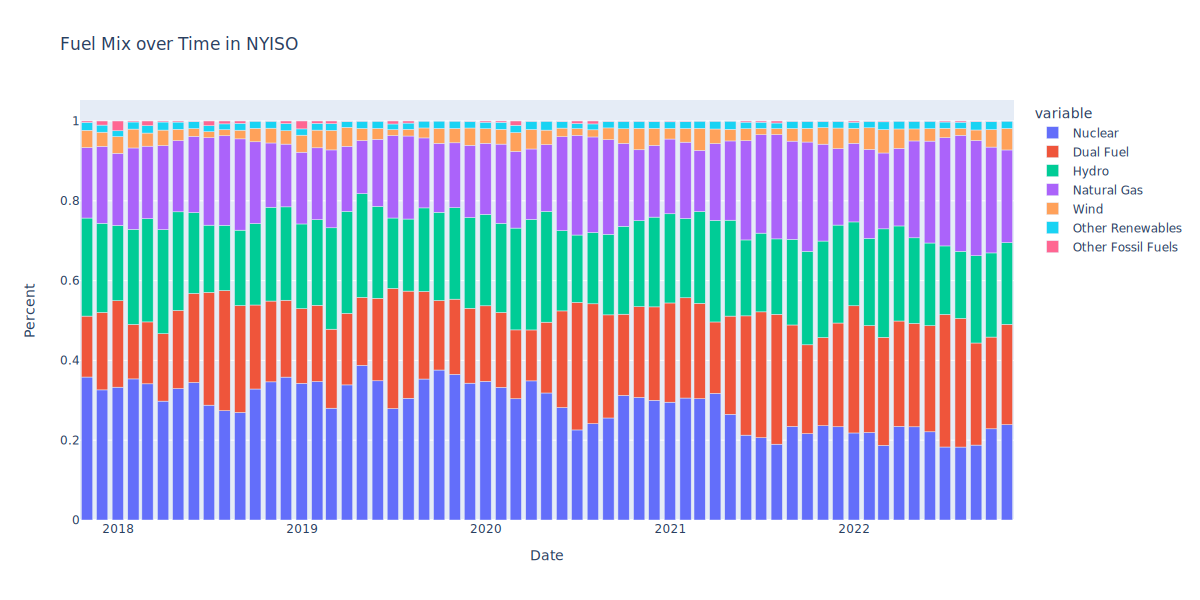

In [8]:
fig = px.bar(percentages, x="Time", y=top_sources, title="Fuel Mix over Time in NYISO")
fig.update_layout(xaxis_title="Date", yaxis_title="Percent")
fig.show("svg", width=1200, height=600)

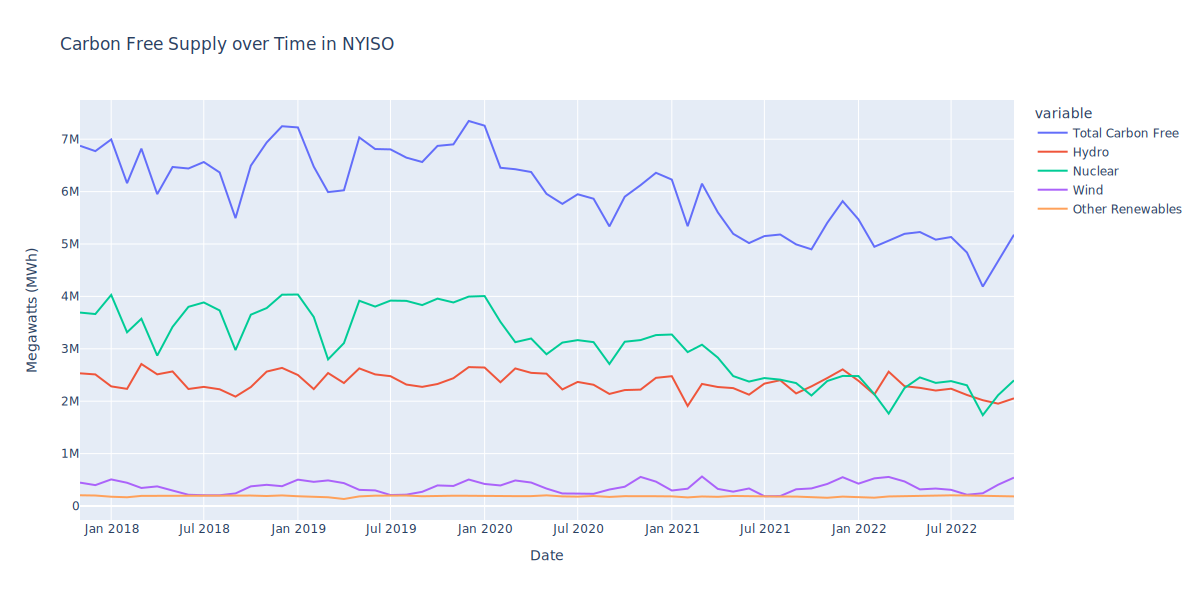

In [9]:
carbon_free = ["Hydro", "Nuclear", "Wind", "Other Renewables"]
data["Total Carbon Free"] = data[carbon_free].sum(axis=1)
fig = px.line(
    data,
    x="Time",
    y=["Total Carbon Free"] + carbon_free,
    title="Carbon Free Supply over Time in NYISO",
)
fig.update_layout(xaxis_title="Date", yaxis_title="Megawatts (MWh)")
fig.show("svg", width=1200, height=600)